In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from PIL import Image
import sklearn.cluster

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

from matplotlib.pyplot import figure

In [2]:
n_colors = 64  # Number of cluster centers/colors we will use to represent the image

# Load the rubix cube picture
rubix = Image.open("Rubix_cube_ps9.jpg") #Rubix_cube_ps9

# The image is 400 (width) by 410 (height) by 3 (for RGB color channels)
print('Shape of image:', rubix.size)

# Each pixel value can range from 0 to 255:
print('Smallest pixel value:', np.min(rubix))
print('Largest pixel value:', np.max(rubix))

Shape of image: (400, 410)
Smallest pixel value: 0
Largest pixel value: 255


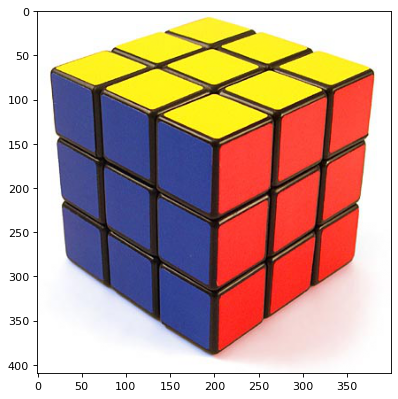

In [3]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
rubix = np.array(rubix, dtype=np.float64) / 255

figure(figsize=(8, 6), dpi=80)
# Let's take a look at the image
plt.imshow(rubix)
plt.show()

In [4]:
# Load image and transform to a 2D numpy array, where each row is for one pixel
w, h, d = original_shape = tuple(rubix.shape)
assert d == 3
image_array = np.reshape(rubix, (w * h, d))

In [5]:
print("Selecting a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0)[:3000]  # Take a random subsample of size 3000

Selecting a small sub-sample of the data


Let's see what the image looks like when we recreate it using our  𝑘 -means result. In the recreation, the color of each pixel is going to be the color of the nearest cluster center.

In [6]:
def recreate_image(codebook, labels, w, h):
    """Recreate the compressed image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

Number of Cluster:  2
[[0.98090478 0.95561707 0.76477252]
 [0.50045885 0.24318261 0.3151554 ]]


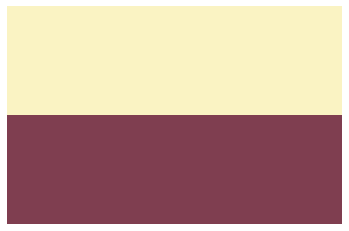

<Figure size 432x288 with 0 Axes>

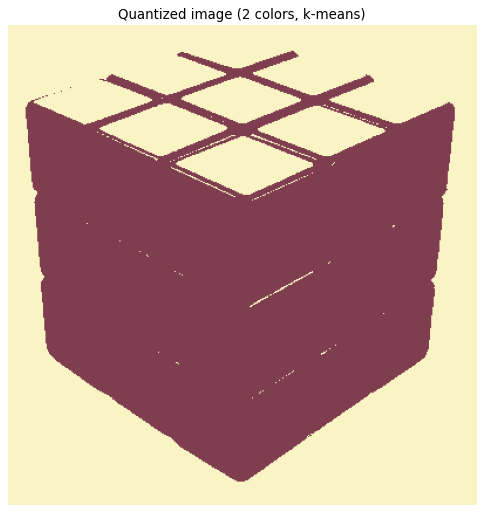

Number of Cluster:  5
[[0.9872549  0.94989344 0.13932225]
 [0.23485373 0.14591591 0.10699381]
 [0.97769713 0.95659727 0.95864711]
 [0.96588772 0.2497832  0.20009977]
 [0.25995267 0.29560514 0.55362407]]


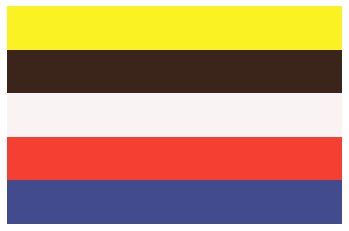

<Figure size 432x288 with 0 Axes>

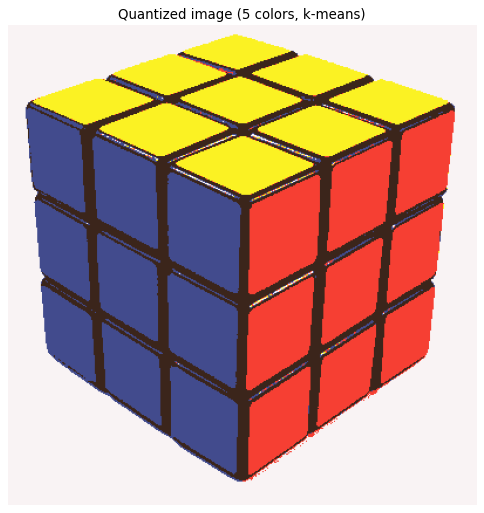

Number of Cluster:  8
[[0.98519157 0.2416359  0.19727623]
 [0.94760867 0.85481896 0.85156137]
 [0.24137906 0.28416902 0.56459735]
 [0.99035857 0.95355866 0.13583577]
 [0.20310812 0.12278274 0.09429976]
 [0.81684822 0.65446623 0.61764706]
 [0.51390056 0.34807423 0.2387605 ]
 [0.98918231 0.98863579 0.99191489]]


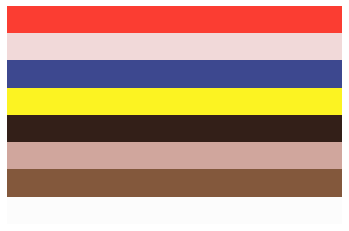

<Figure size 432x288 with 0 Axes>

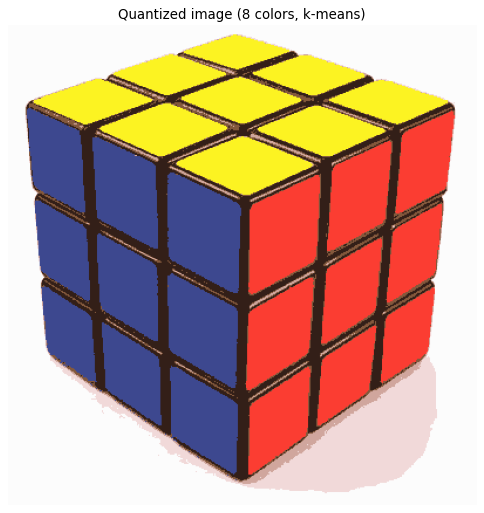

Number of Cluster:  11
[[0.98983671 0.98923145 0.99213164]
 [0.36840336 0.30901961 0.28078431]
 [0.98648504 0.24148607 0.19701961]
 [0.992783   0.9566101  0.13400341]
 [0.24026094 0.2844657  0.5689907 ]
 [0.10630945 0.05890118 0.04756358]
 [0.64126984 0.55060691 0.35723623]
 [0.87536765 0.70618873 0.68002451]
 [0.94835116 0.86606506 0.8676025 ]
 [0.60616246 0.23520075 0.14126984]
 [0.2416504  0.15030202 0.11225723]]


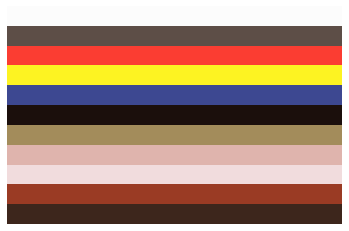

<Figure size 432x288 with 0 Axes>

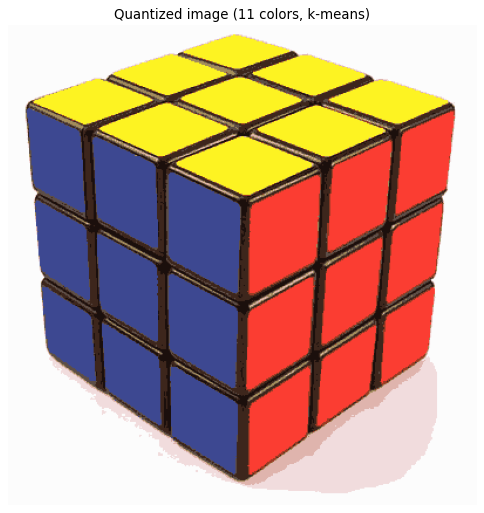

Number of Cluster:  14
[[0.99557121 0.99517671 0.99480099]
 [0.5664017  0.48627451 0.39162692]
 [0.60616246 0.23520075 0.14126984]
 [0.99569196 0.96012504 0.12793407]
 [0.24008139 0.28406955 0.56826489]
 [0.23266705 0.14169046 0.10548258]
 [0.98624921 0.26724858 0.21981025]
 [0.84130163 0.66633292 0.6472257 ]
 [0.93248543 0.92246953 0.95702173]
 [0.95664638 0.84576065 0.82972279]
 [0.9869281  0.19308378 0.15420083]
 [0.09734205 0.0540305  0.04583878]
 [0.84433078 0.77766411 0.27365729]
 [0.35105679 0.28321874 0.24517443]]


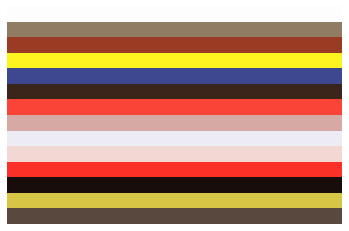

<Figure size 432x288 with 0 Axes>

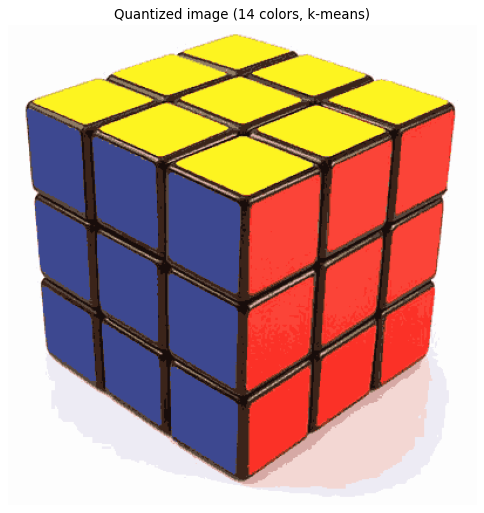

Number of Cluster:  17
[[0.24008303 0.28415434 0.56860521]
 [0.99550339 0.99515931 0.99531957]
 [0.98901961 0.26730955 0.220135  ]
 [0.99599397 0.96004827 0.1188537 ]
 [0.2035014  0.13295985 0.09232026]
 [0.95274831 0.83262617 0.82349727]
 [0.68510864 0.2327504  0.18028617]
 [0.7504644  0.67905057 0.20247678]
 [0.08393246 0.04248366 0.0421024 ]
 [0.43569428 0.35766307 0.24705882]
 [0.27080312 0.21611604 0.22207897]
 [0.5841629  0.50829563 0.45082956]
 [0.93930584 0.92168132 0.94392608]
 [0.39453357 0.12537136 0.0631016 ]
 [0.988933   0.19251774 0.15416817]
 [0.98377282 0.94658553 0.31386072]
 [0.8473262  0.66791444 0.64982175]]


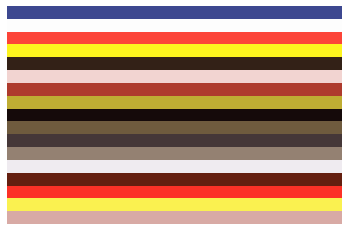

<Figure size 432x288 with 0 Axes>

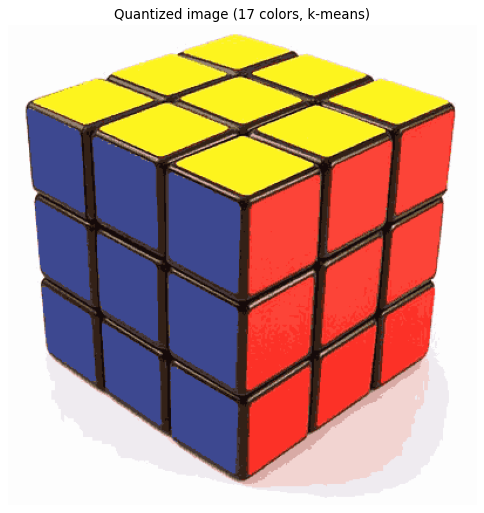

Number of Cluster:  20
[[0.99601847 0.96024465 0.1195179 ]
 [0.221574   0.27538007 0.57468708]
 [0.99585137 0.99543982 0.99482012]
 [0.98901961 0.26730955 0.220135  ]
 [0.42167183 0.07698658 0.04334365]
 [0.96227959 0.86037523 0.84705882]
 [0.42604324 0.35806938 0.2860734 ]
 [0.08948307 0.04537815 0.04053985]
 [0.98799617 0.19268293 0.15444763]
 [0.68111455 0.60928793 0.14819401]
 [0.87130125 0.62923351 0.60017825]
 [0.67287582 0.22821351 0.17342048]
 [0.9659709  0.92232764 0.31587603]
 [0.59201162 0.50326797 0.44793028]
 [0.20469228 0.1354868  0.10037402]
 [0.86877092 0.73390722 0.72797704]
 [0.92985677 0.92601863 0.96389932]
 [0.2362407  0.23407708 0.35889114]
 [0.28345902 0.30580694 0.56199095]
 [0.32613308 0.22603664 0.15030537]]


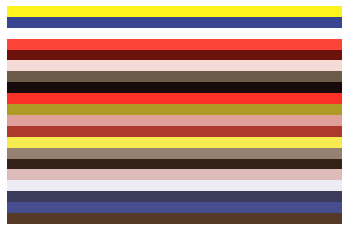

<Figure size 432x288 with 0 Axes>

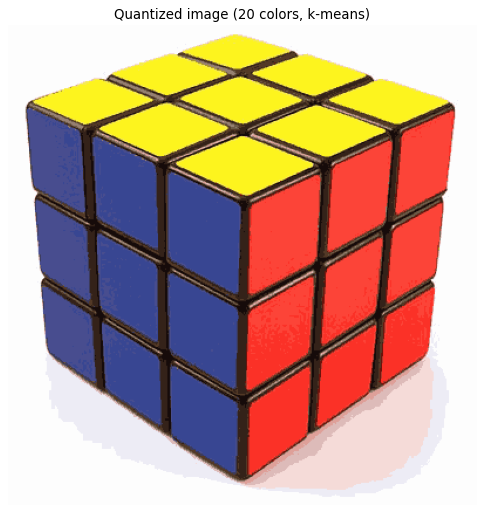

In [7]:
# run KMeans range 2 to 20 cluster in gap 3

for i in range(2, 21, 3):
    print("Number of Cluster: ", i)
    kmeans = sklearn.cluster.KMeans(n_clusters=i, init='k-means++')
    labels = kmeans.fit_predict(image_array_sample)
    print(kmeans.cluster_centers_)
    
    # First recall that each cluster center is just a vector of three numbers:
    kmeans.cluster_centers_[0, :]
    
    # Now let's plot the colors that were the cluster centers in k-means.
    colors = np.expand_dims(kmeans.cluster_centers_, axis=1)
    plt.axis('off')
    plt.imshow(colors, aspect='auto')
    plt.show()
    
    labels = kmeans.predict(image_array)
    
    plt.clf()
    figure(figsize=(8, 6), dpi=80)
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title('Quantized image (%d colors, k-means)' %i)
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show()